# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the Maximum Likelihood Estimate (MLE) method to estimate the parameters of some model, given some observations.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [2]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# show matplotlib figures inline
%matplotlib inline

In [3]:
# By default we set figures to be 6"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(6, 4), dpi=110)
plt.rc('font', size=10)

## 1. MLE recipe

Let's suppose you're given some one dimensional data points $D = \{d_0, d_1, ...,  d_n \}$ which you believe follows a normal distribution. In this case then, our model is the Gaussian distribution, which has parameters $\mu$ and $\sigma^2$, while our observations are provided by $D$.

Assuming the standard deviation ($\sigma$) is 0.5, you wish to estimate the parameter $\mu$ of the model, that is the mean of the normal distribution representing your data. 

Use the Maximum Likelihood Estimate (MLE) formula to show that $\mu_{ML} = \frac{\sum_i d_i}{N}$.

**Hint**: assuming our data points are independent, we have 

$$p(D|\mu) = \prod_i p(d_i | \mu) = \prod_i \mathcal{N}(d_i|\mu, \sigma^2)$$

**Note:** This should be done on paper (or preferably in $\LaTeX$ in the cell below), not using Python.

### Answer

Write here your answer using latex notation. Alternatively, write your solution on paper and show it to a TA.



## 2. MLE with Python

We know want you to write a simple program that calculates $\mu_{ML}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

[ 0.49243   0.62491   0.85002   1.2884    0.7762    0.57076   0.27376
  0.99141  -0.34415   0.11251   1.0682    0.92343   0.06158   0.96851
  0.93473   0.10785   0.66411   1.501     0.45324   0.026227  0.77938
  0.41992   0.52065   0.90508   0.67258   0.50928   0.18414   0.28987
  0.18824   0.39742   1.5803    0.77383   0.42532   0.63607   0.82266
  0.83804   0.85936   1.2453    0.52806   0.87756   0.39069  -0.22948
  0.41403   1.409     0.5227    1.2109    1.0009    0.40137   1.6567
  1.1367  ]


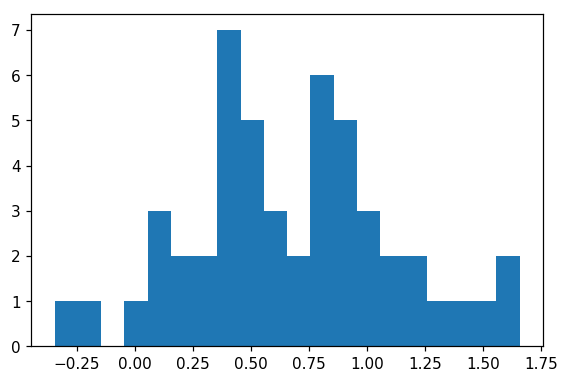

In [8]:
# write your code here
data1 = np.loadtxt('data1.dat', delimiter=',')
plt.hist(data1, bins=20)
plt.show()


You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we saw above, which again we believe follow a Gaussian distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [ ]:
# write your code here
def compute_likelihood(D, mu):
    sigma = 0.5
    S = 1/(np.root(2*np.pi)*sigma)*np.exp(-1/(2*sigma**2)*(D[]))
    return np.prod(S)
    

Write now a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, ... , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array.

In [ ]:
# write your code here



### Questions:

- What is the value of the maximum likelihood $ML = \max p(D|\mu)$ ? 

- What is $\mu_{ML} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [ ]:
# write your code here



### Visual interpretation

Look at the obtained $\mu_{ML}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located in correspondence to $\mu_{ML}$. Where does this line lie? Is it a meaningful position?

In [ ]:
# write your code here



### Comparison with MLE recipe

Implement now the MLE recipe you solved at the beginning of this sheet to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [ ]:
# write your code here



### Answer

By using the MLE recipe we found that the parameter $\mu$ maximising the likelihood was given by the mean of the data points $D$. 

In fact, the mean of $D$ corresponds to the previously obtained $\mu_{ML} = argmax_\mu P(D|\mu)$, which was $0.67$.

# 3. Posterior probability

Let's suppose now we have some prior knowledge regarding our parameter $\mu$. More precisely, our believe is that the probability density function (pdf) $p(\mu)$ modelling our parameter is also given by a normal distribution.

Assuming that $p(\mu) = \mathcal{N}(0.5,0.01)$, write now two functions, `compute_posterior(D, mu)` and `loop_posterior(D)`, to find $\mu_{MAP} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

In [ ]:
# write your code here



### Visual interpretation


Now plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

In [ ]:
# write your code here



Repeat now the above calculations for `data2.dat` and `data3.dat`. 

For both files, plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$.

In [ ]:
# write your code here



### Question

Observe the results obtained on `data2` and `data3`. What can we tell by looking at the figures you plotted above?

### Answer

Write your answer here.

## EXTRA 1

Until now, you assumed that our data was generated from a normal distribution with $\sigma^2 = 0.25$. 

Remove this assumption and estimate $\theta_{MAP} = [\mu_{MAP}, \sigma_{MAP}]$ experimentally by looping through different values of $\mu$ and $\sigma$. 

Assume the pdf $p(\sigma)$ is given by $\mathcal{N}(0.5, 0.16)$.

You may need to use `np.nanargmax` instead of `np.argmax`.

In [ ]:
# write your code here




## EXTRA 2

Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface`).
![MLE mesh](mle2.png)

In [ ]:
# write your code here


